# **Explorasi Data (NO2 Medan)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Membaca dataset**

In [ ]:
df = pd.read_csv('timeseries.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df

date  feature_index       NO2
0   2020-04-30 00:00:00+00:00              0       NaN
1   2020-05-01 00:00:00+00:00              0       NaN
2   2020-05-02 00:00:00+00:00              0  0.000029
3   2020-05-03 00:00:00+00:00              0  0.000025
4   2020-05-04 00:00:00+00:00              0       NaN
..                        ...            ...       ...
391 2021-05-26 00:00:00+00:00              0       NaN
392 2021-05-27 00:00:00+00:00              0       NaN
393 2021-05-28 00:00:00+00:00              0  0.000028
394 2021-05-29 00:00:00+00:00              0  0.000020
395 2021-05-30 00:00:00+00:00              0  0.000034

[396 rows x 3 columns]

### **Jumlah Missing Value**

/tmp/ipython-input-4243173396.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",


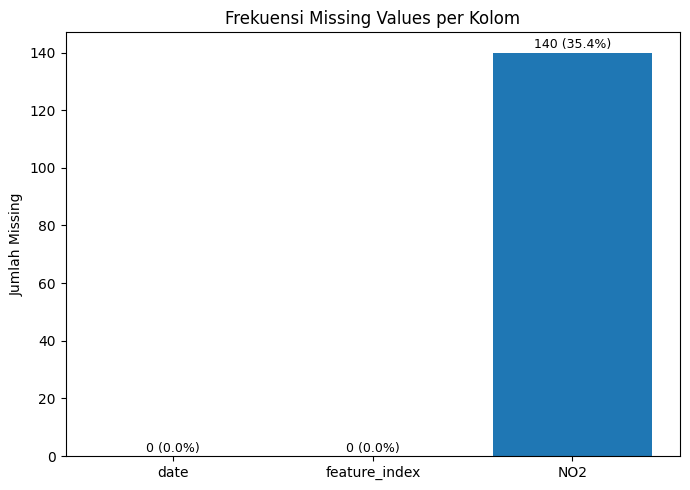

Missing Count  Missing Percent (%)
date                       0                 0.00
feature_index              0                 0.00
NO2                      140                35.35

In [ ]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

fig, ax = plt.subplots(figsize=(7,5))

bars = ax.bar(missing_count.index, missing_count)

ax.set_title("Frekuensi Missing Values per Kolom")
ax.set_ylabel("Jumlah Missing")

for i, v in enumerate(missing_count):
    ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

### **Tabel Informasi Dataset**

In [ ]:
info_table = pd.DataFrame({
    "Kolom": df.columns,
    "Tipe Data": df.dtypes.astype(str),
    "Jumlah Data Tidak Kosong": len(df) - df.isna().sum(),
    "Jumlah Missing": df.isna().sum()
})
info_table

Kolom            Tipe Data  Jumlah Data Tidak Kosong  \
date                    date  datetime64[ns, UTC]                       396   
feature_index  feature_index                int64                       396   
NO2                      NO2              float64                       256   

               Jumlah Missing  
date                        0  
feature_index               0  
NO2                       140

### **Visualisasi Time Series NO₂**

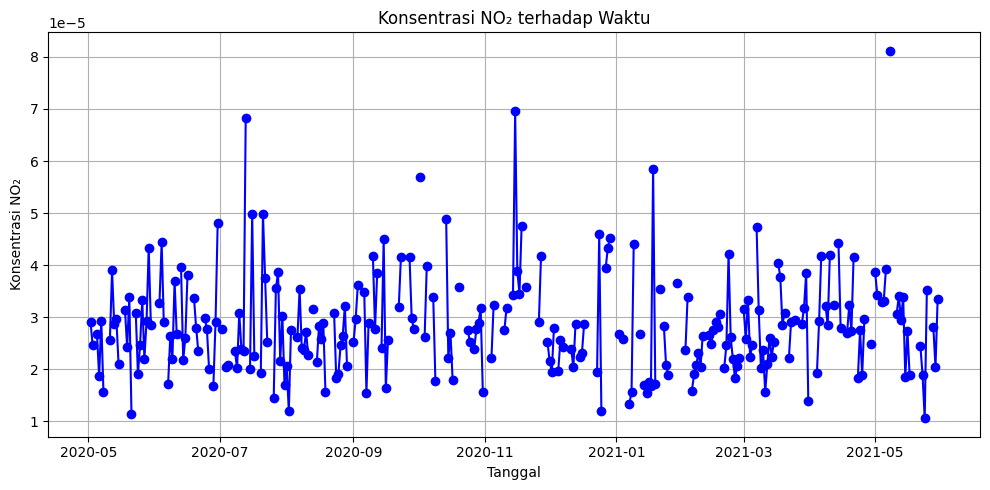

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['NO2'], marker='o', linestyle='-', color='blue')
plt.title("Konsentrasi NO₂ terhadap Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi NO₂")
plt.grid(True)
plt.tight_layout()
plt.show()